In [214]:
import pypsa
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
from pypsa.plot import add_legend_lines, add_legend_patches, add_legend_semicircles


In [215]:
fn = "results/DK_test/networks/base_s_2__12h_2050.nc"
n = pypsa.Network(fn)
stat=n.statistics()


INFO:pypsa.network.io:New version 1.0.3 available! (Current: 0.35.2)
INFO:pypsa.network.io:Imported network 'Unnamed Network' has buses, carriers, generators, global_constraints, links, loads, stores


In [216]:
n.links.loc[n.links.index.str.contains('Electrolysis')]

,bus0,bus1,type,carrier,efficiency,active,build_year,lifetime,p_nom,p_nom_mod,...,underground,under_construction,tags,geometry,dc,underwater_fraction,energy to power ratio,location,reversed,length_original
Link,,,,,,,,,,,,,,,,,,,,,
DK0 0 H2 Electrolysis,DK0 0,DK0 0 H2,,H2 Electrolysis,0.6994,True,0,25.0,0.0,0.0,...,NaN,NaN,,,NaN,NaN,NaN,,False,0.0
DK1 0 H2 Electrolysis,DK1 0,DK1 0 H2,,H2 Electrolysis,0.6994,True,0,25.0,0.0,0.0,...,NaN,NaN,,,NaN,NaN,NaN,,False,0.0
DK0 cluster H2 Electrolysis,DK0 cluster,DK0 cluster H2,,H2 Electrolysis,0.6994,True,0,25.0,0.0,0.0,...,NaN,NaN,,,NaN,NaN,NaN,,False,NaN


In [217]:
n.links.loc[n.links["carrier"]=='methanolisation']

,bus0,bus1,type,carrier,efficiency,active,build_year,lifetime,p_nom,p_nom_mod,...,underground,under_construction,tags,geometry,dc,underwater_fraction,energy to power ratio,location,reversed,length_original
Link,,,,,,,,,,,,,,,,,,,,,
DK0 0 methanolisation,DK0 0 H2,EU methanol,,methanolisation,0.8787,True,0,20.0,0.0,0.0,...,NaN,NaN,,,NaN,NaN,NaN,,False,0.0
DK1 0 methanolisation,DK1 0 H2,EU methanol,,methanolisation,0.8787,True,0,20.0,0.0,0.0,...,NaN,NaN,,,NaN,NaN,NaN,,False,0.0
DK0 cluster methanolization,DK0 cluster H2,EU methanol,,methanolisation,0.8787,True,0,20.0,0.0,0.0,...,NaN,NaN,,,NaN,NaN,NaN,,False,NaN


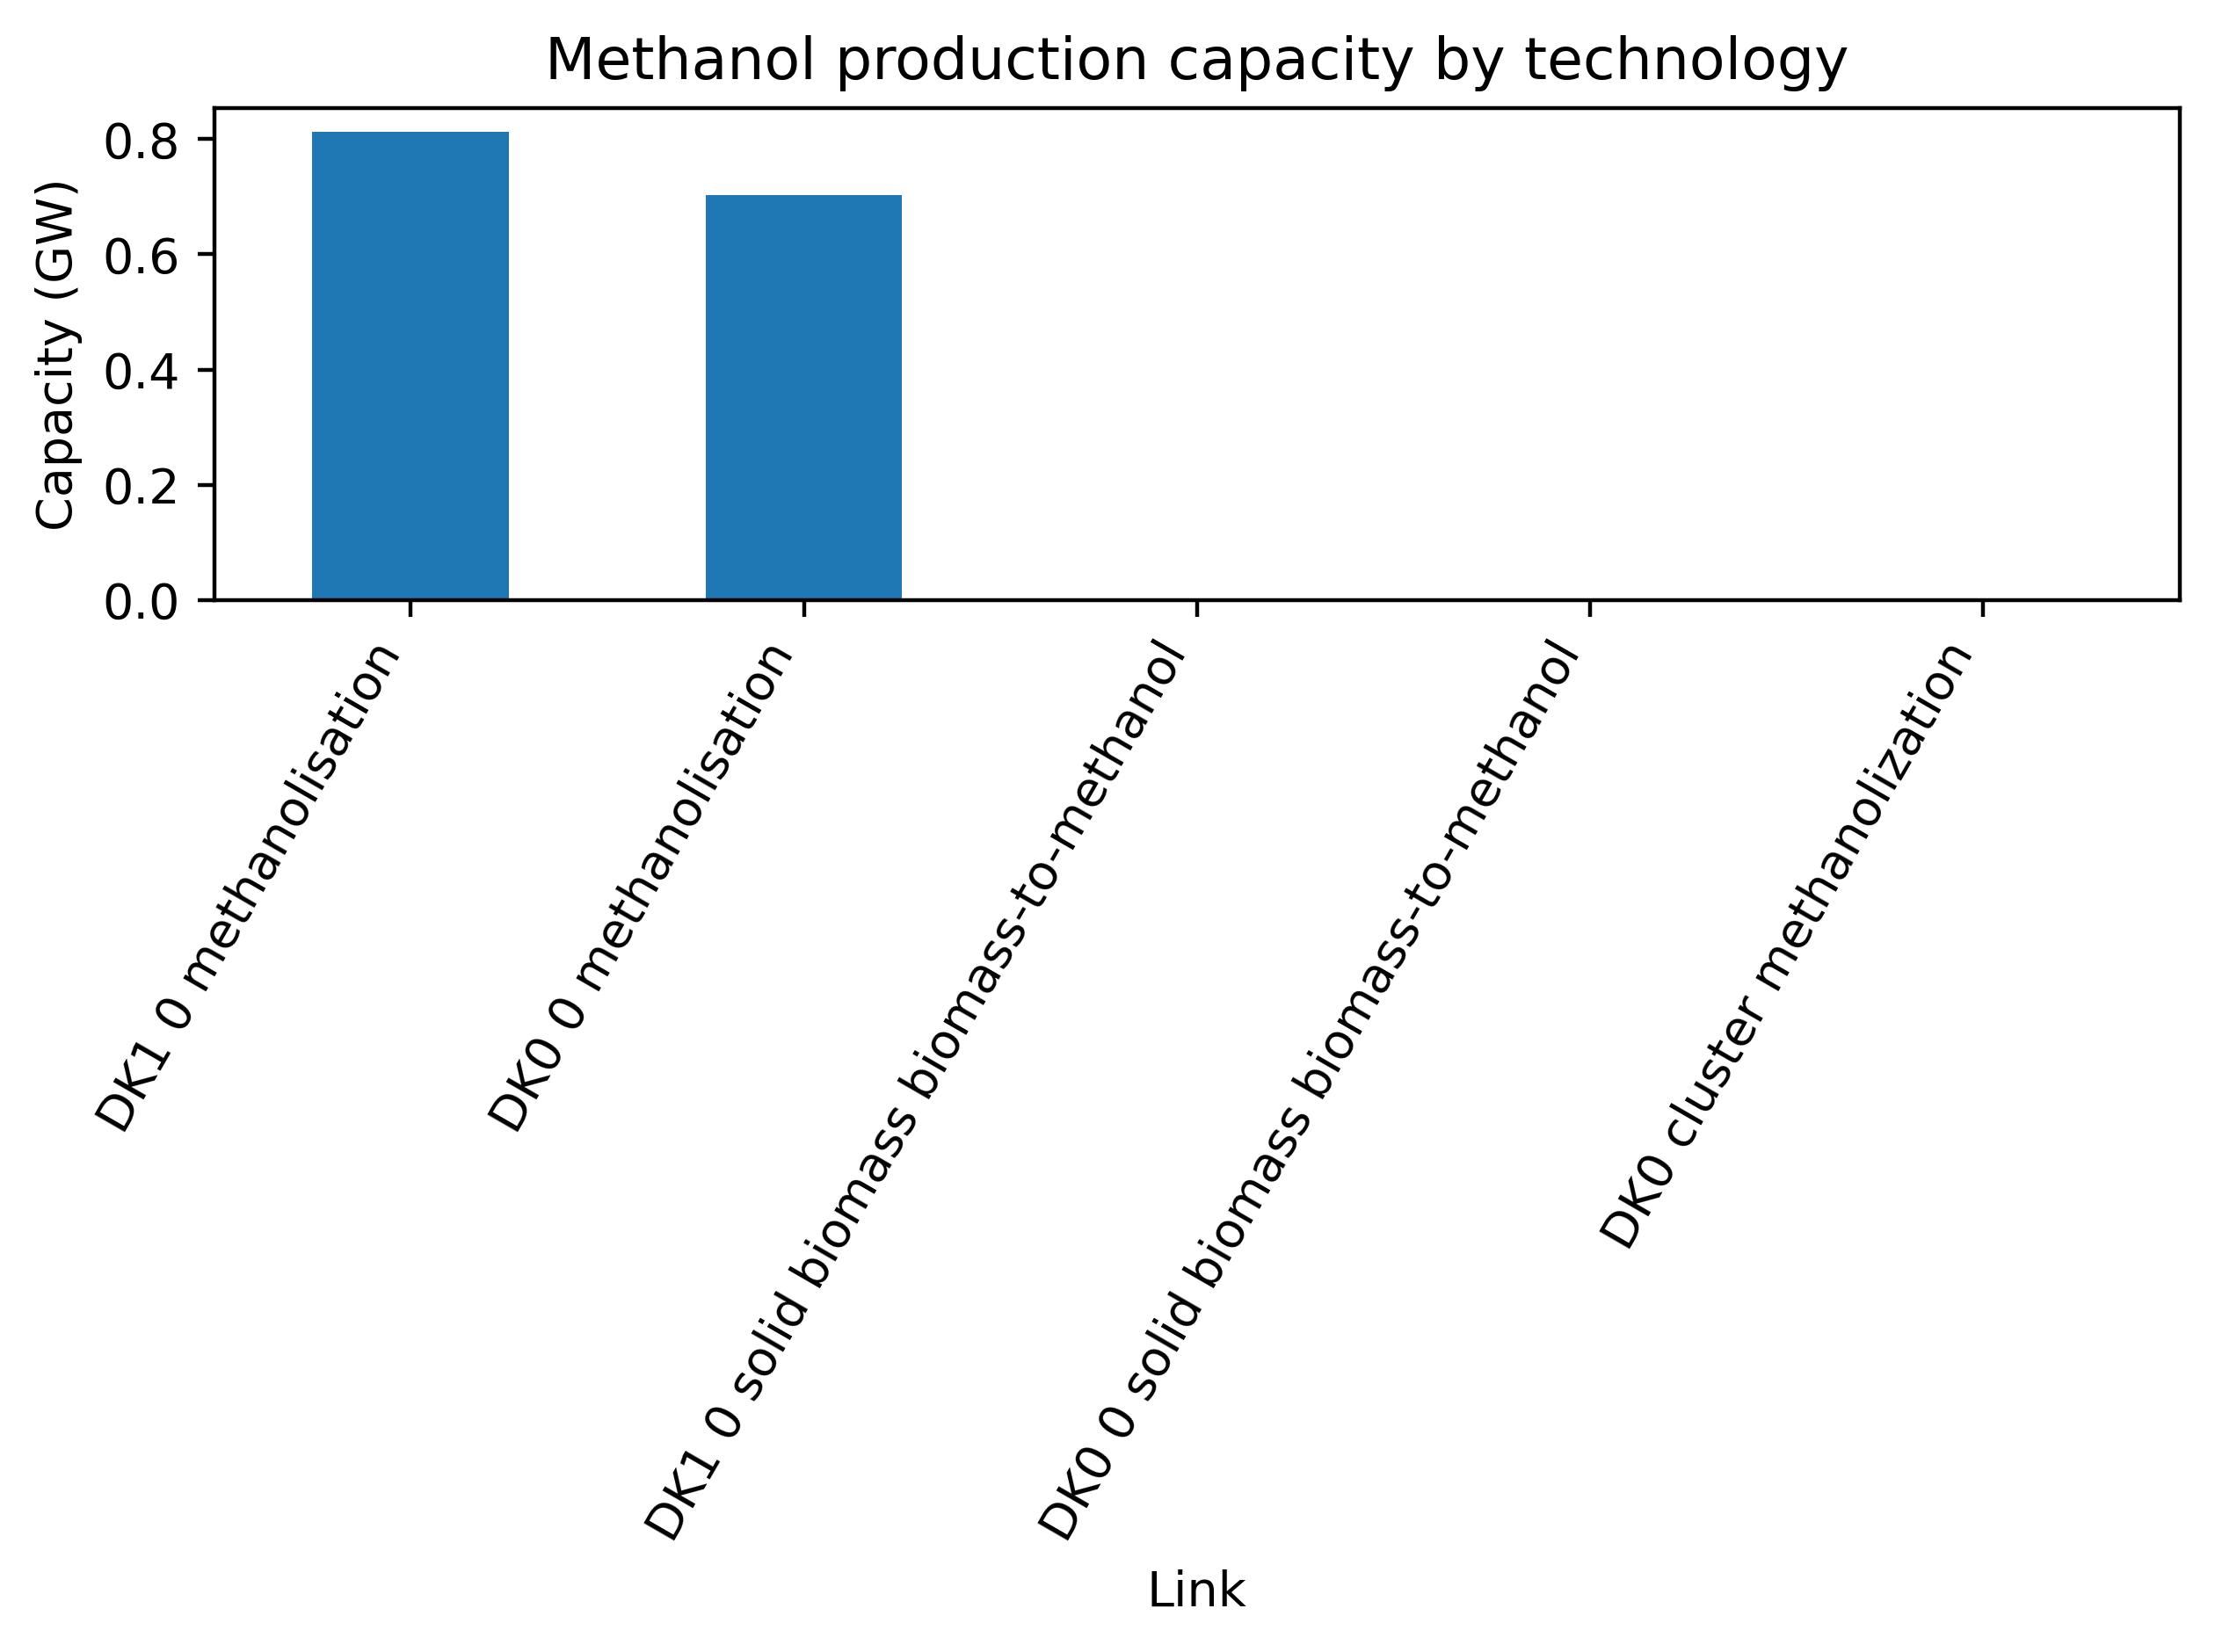

In [218]:
methanol_capacities = n.links.p_nom_opt.loc[n.links["bus1"] == "EU methanol"].sort_values(ascending=False)/10**3

fig, ax = plt.subplots()
methanol_capacities.plot.bar(ax=ax,
                            ylabel="Capacity (GW)",
                            title="Methanol production capacity by technology")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")  

plt.tight_layout()


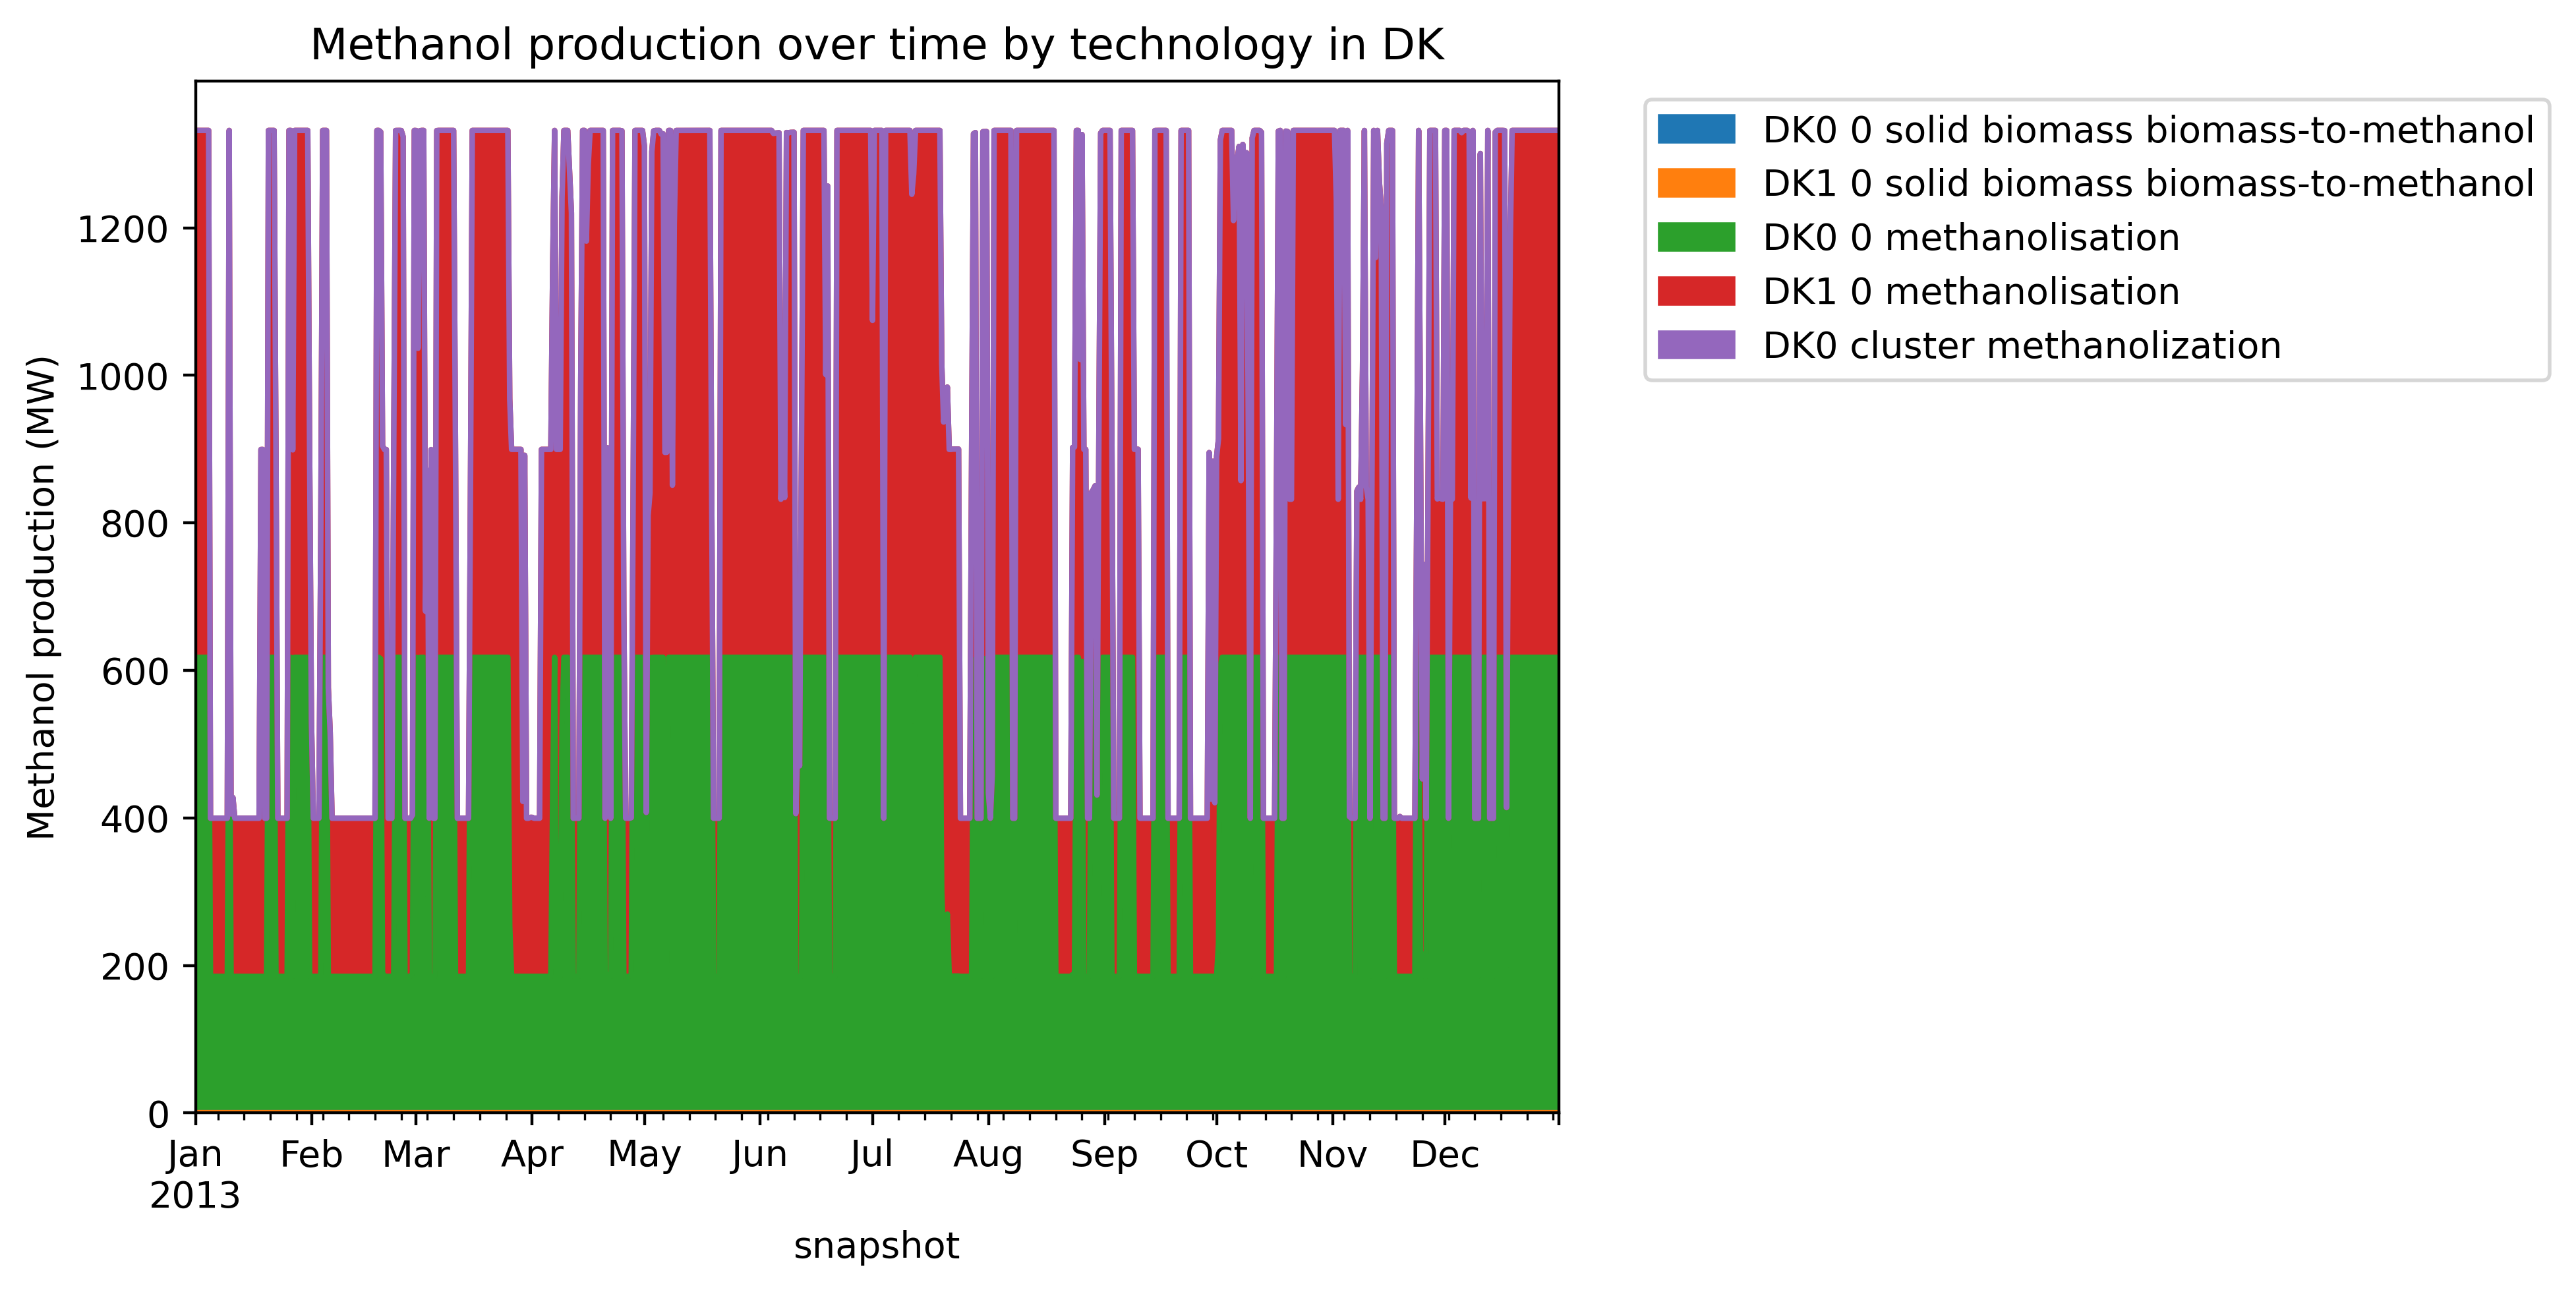

In [219]:
methanol_technologies=["DK0 0 solid biomass biomass-to-methanol",
                       "DK1 0 solid biomass biomass-to-methanol",
                       "DK0 0 methanolisation",
                       "DK1 0 methanolisation",
                       "DK0 cluster methanolization",]

methanol_production_t=n.links_t["p1"][methanol_technologies].abs()

fig,ax=plt.subplots(figsize=(10,5))
methanol_production_t.plot.area(ylabel="Methanol production (MW)", title="Methanol production over time by technology in DK", ax=ax)

leg = ax.legend(
    bbox_to_anchor=(1.05, 1),     
    frameon=True,                  
)

plt.tight_layout()



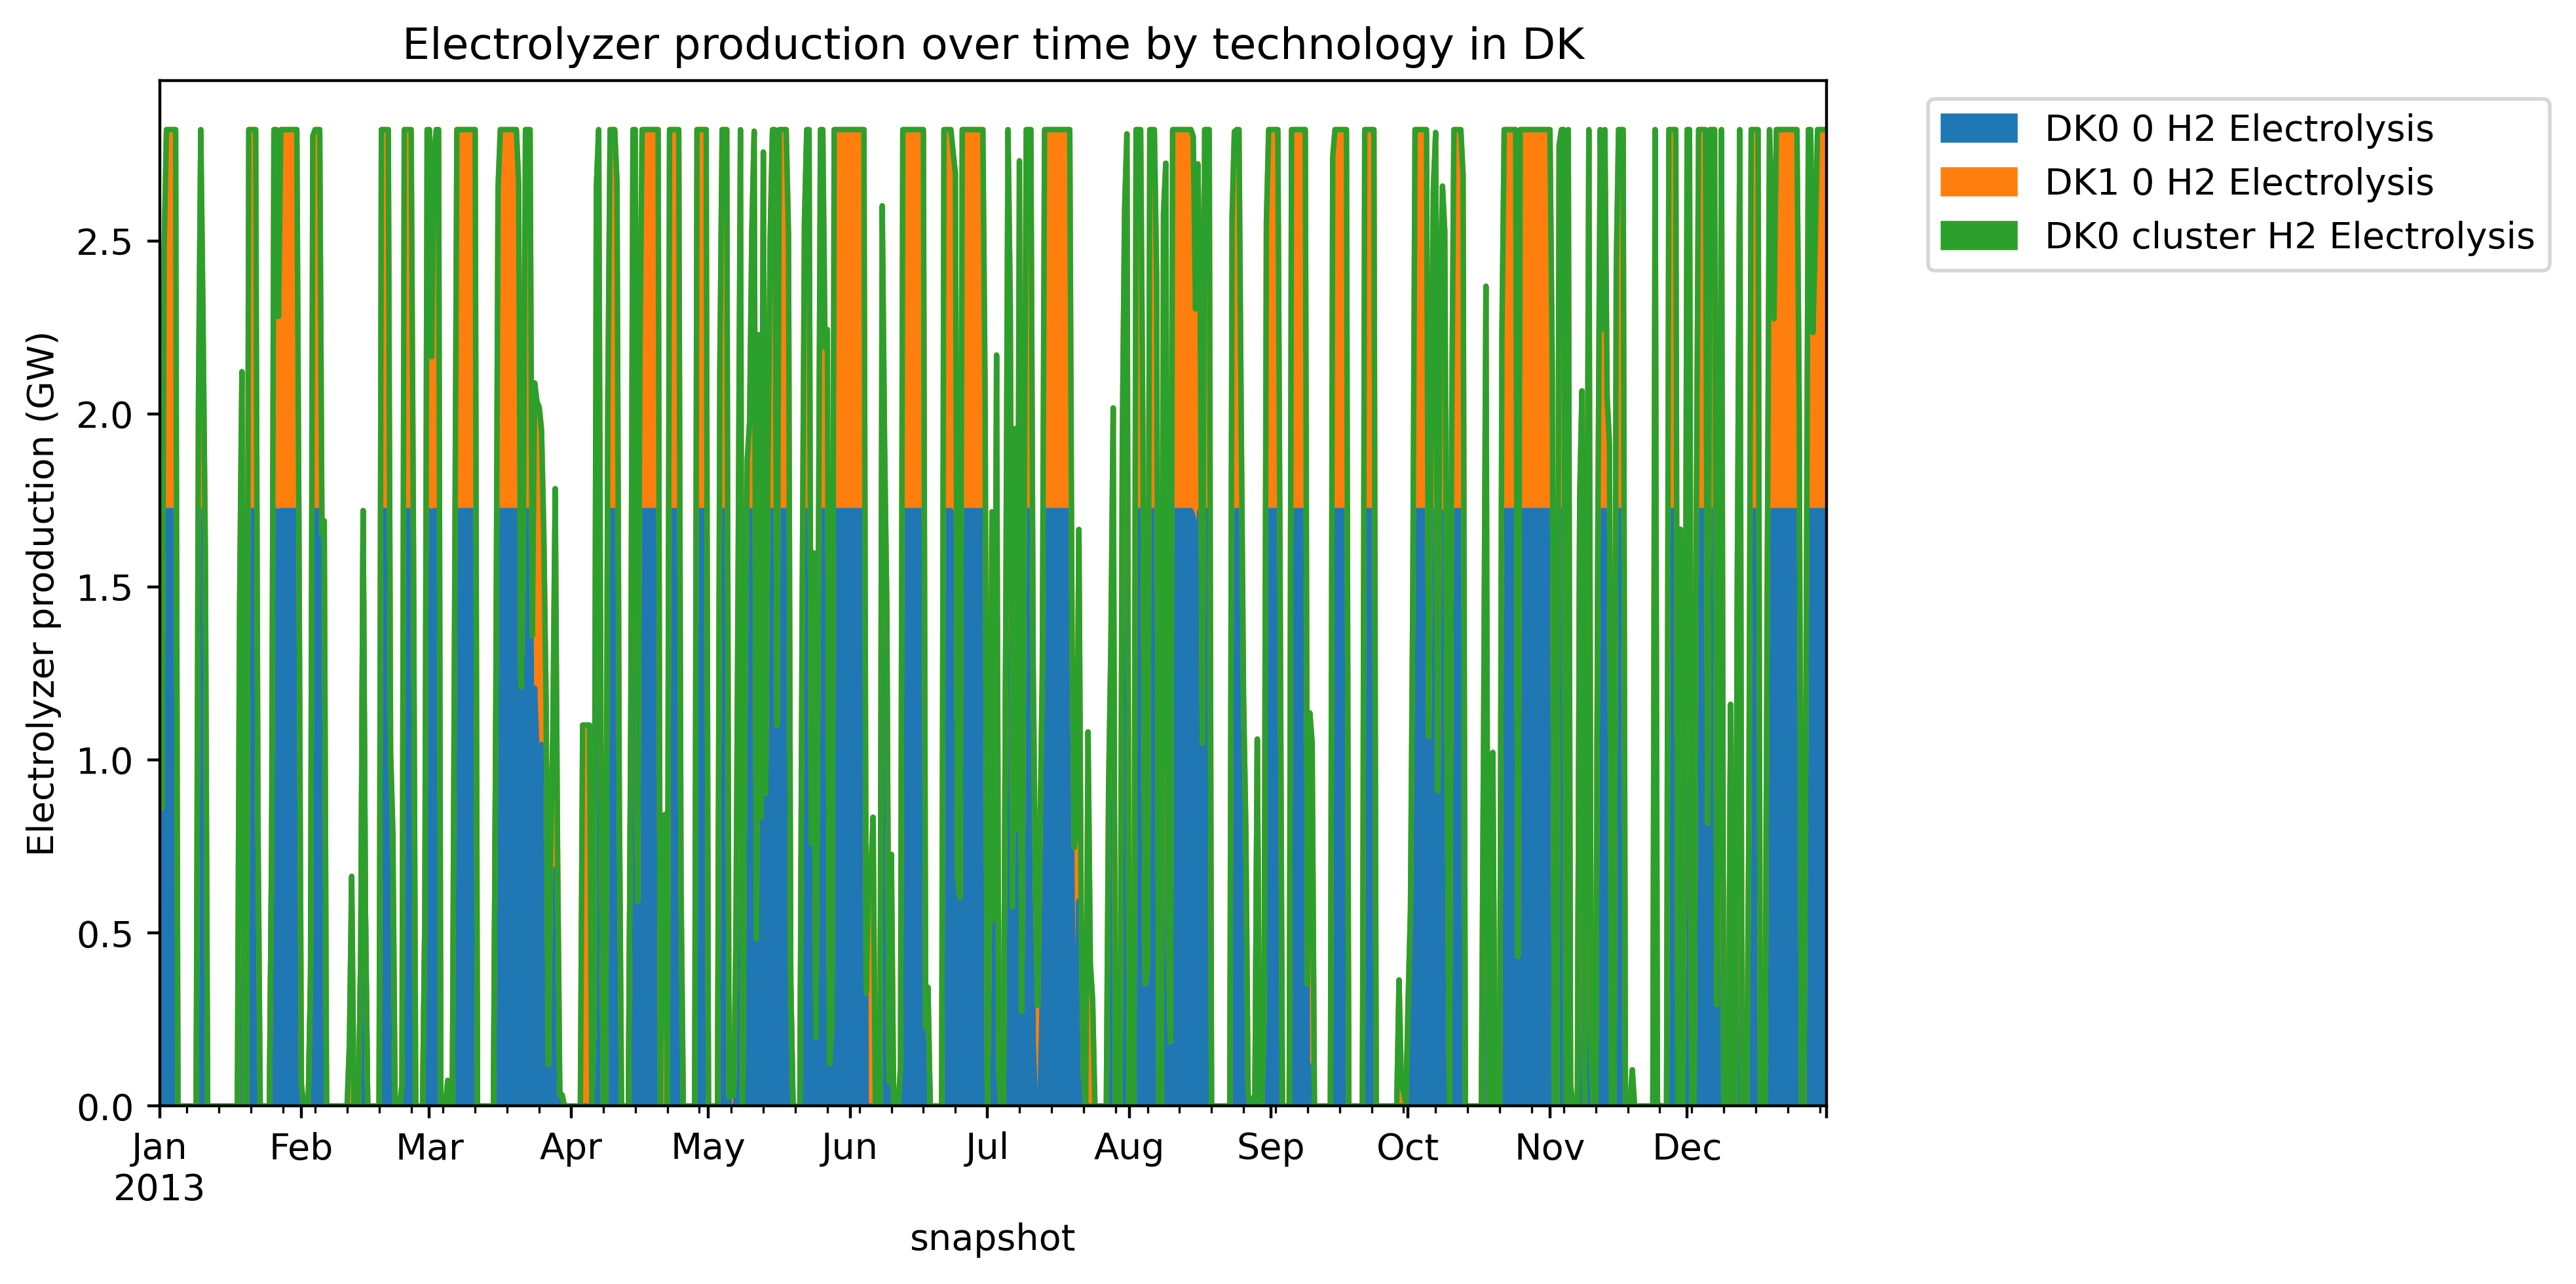

In [220]:
electrolyzers_technologies=["DK0 0 H2 Electrolysis",
                            "DK1 0 H2 Electrolysis",
                            "DK0 cluster H2 Electrolysis",
                       ]

electrolyzers_production_t=n.links_t["p1"][electrolyzers_technologies].abs()/10**3
fig,ax=plt.subplots(figsize=(10,5))
electrolyzers_production_t.plot.area(ylabel="Electrolyzer production (GW)", title="Electrolyzer production over time by technology in DK", ax=ax)

leg = ax.legend(
    bbox_to_anchor=(1.05, 1),     
    frameon=True,                  
)

plt.tight_layout()

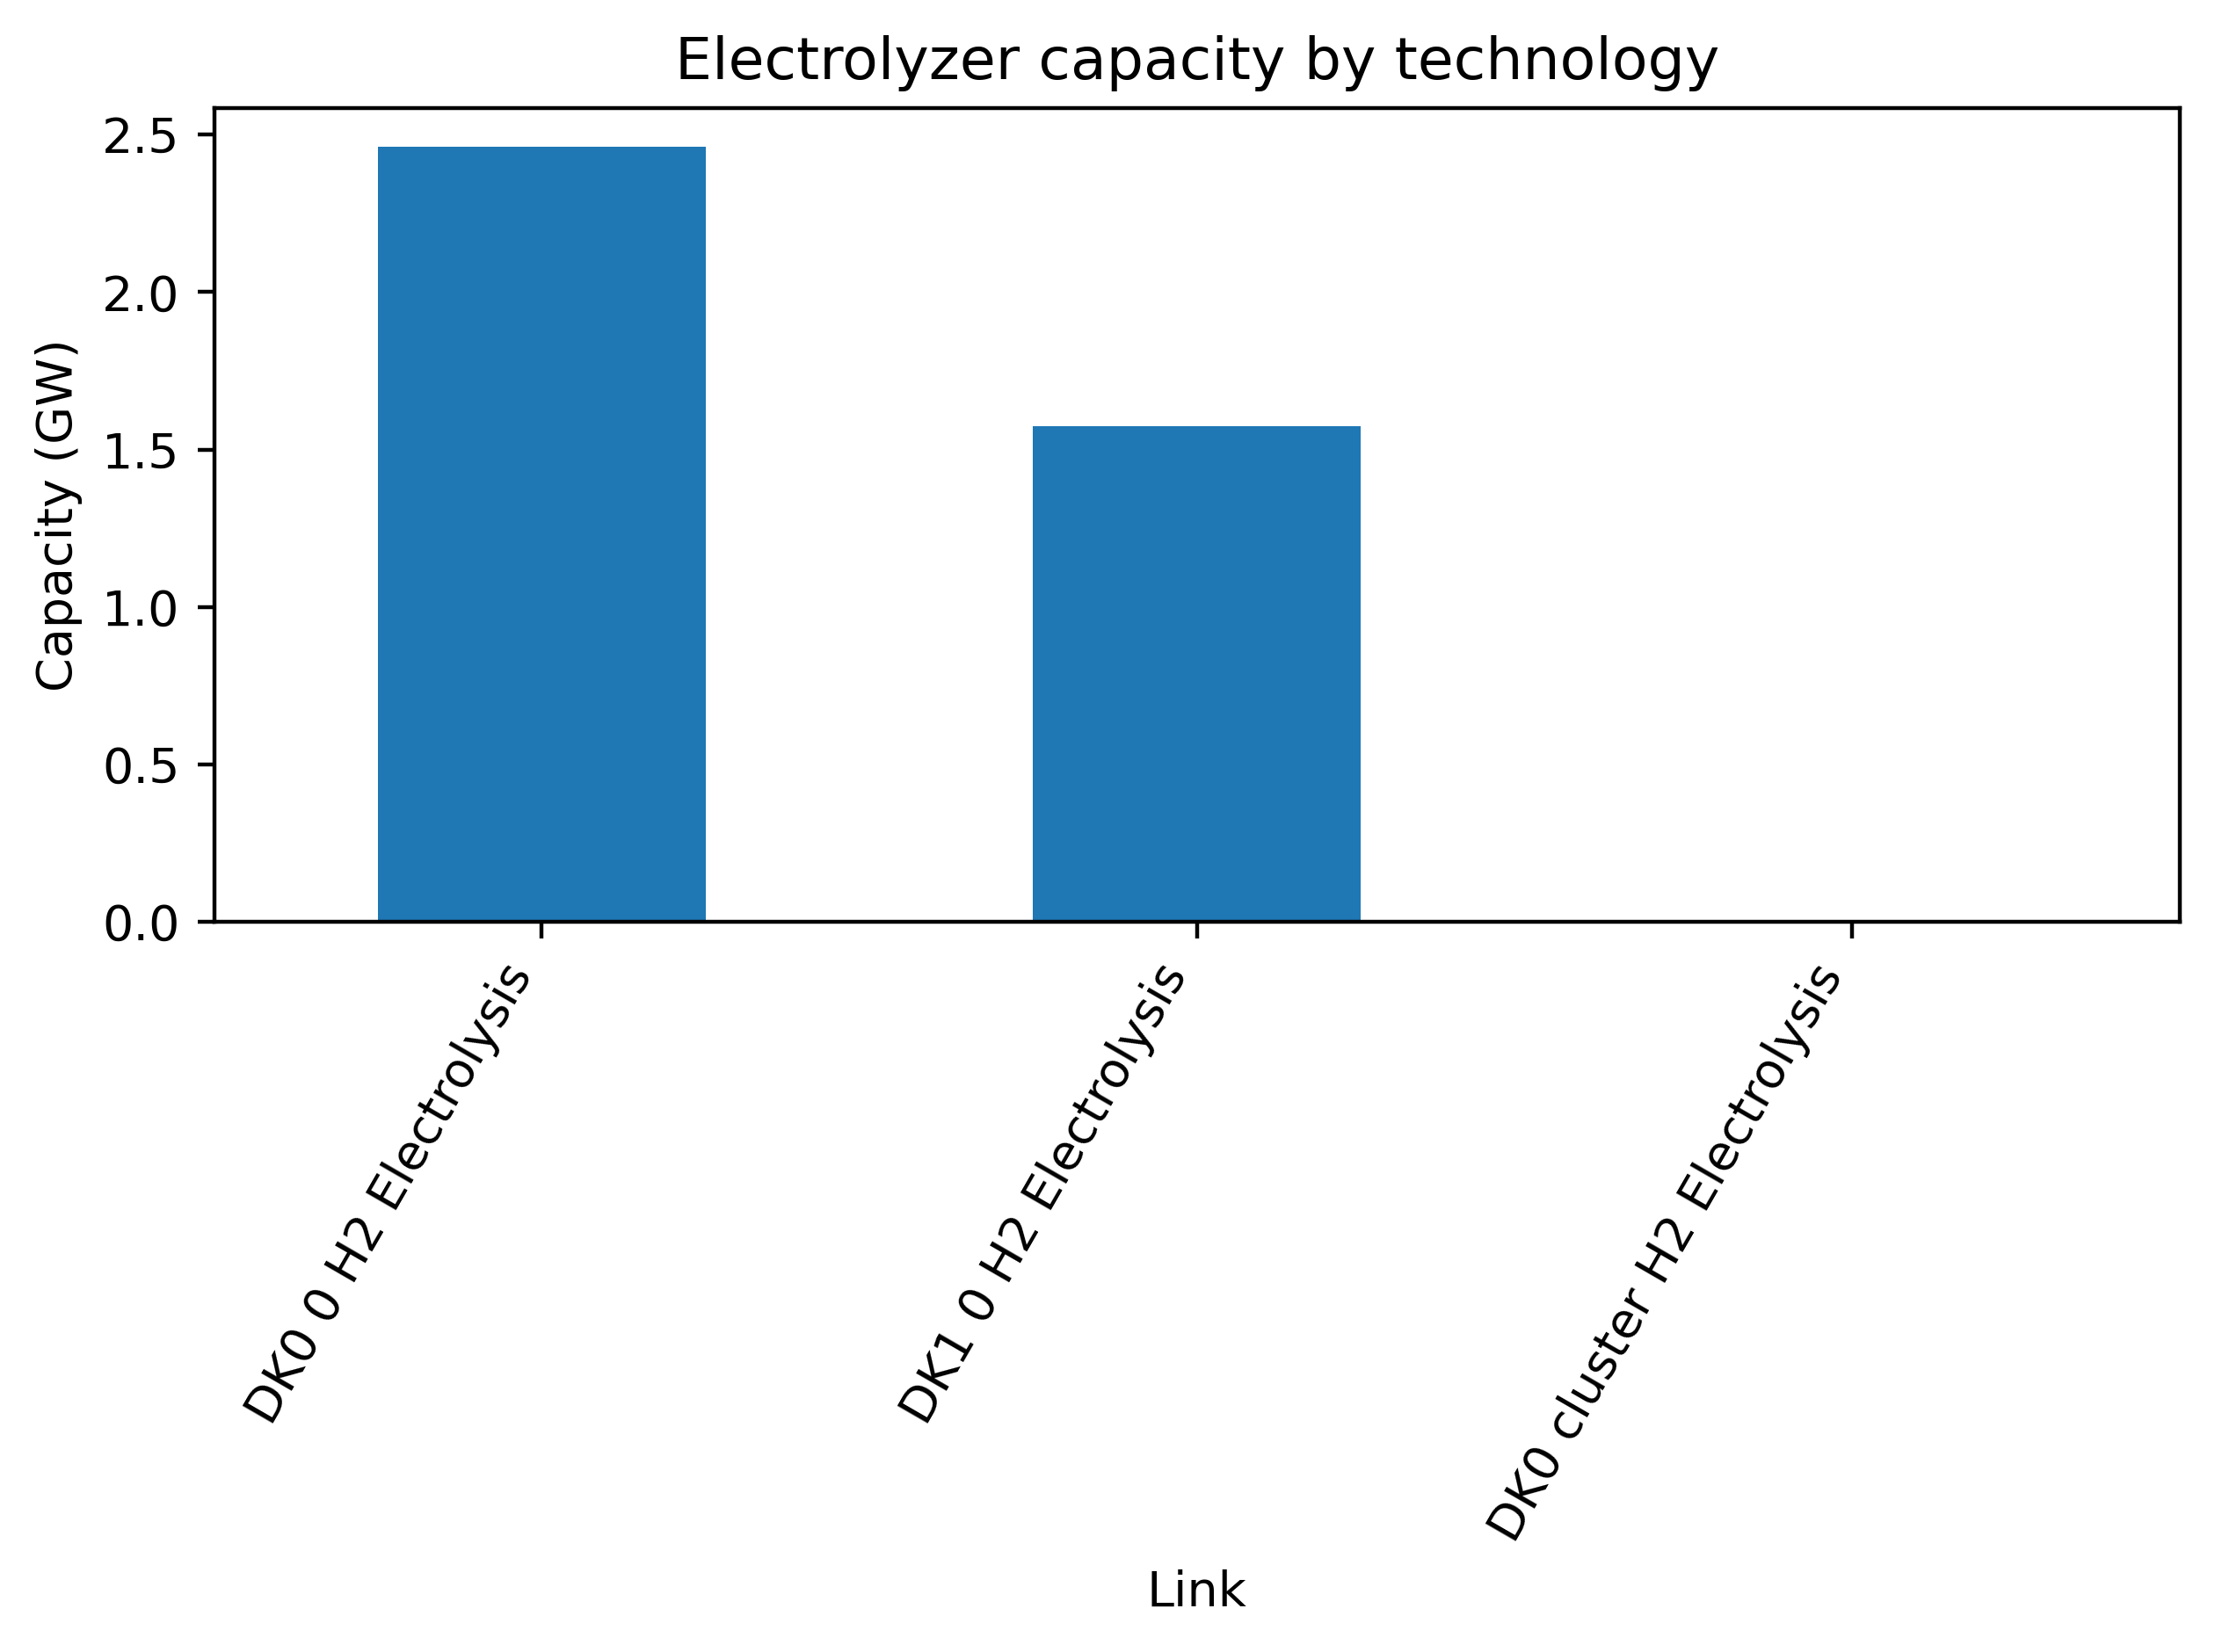

In [221]:
electrolyzers_capacities = n.links.p_nom_opt.loc[n.links["carrier"] == "H2 Electrolysis"].sort_values(ascending=False)/10**3

fig, ax = plt.subplots()
electrolyzers_capacities.plot.bar(ax=ax,
                            ylabel="Capacity (GW)",
                            title="Electrolyzer capacity by technology")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")  

plt.tight_layout()

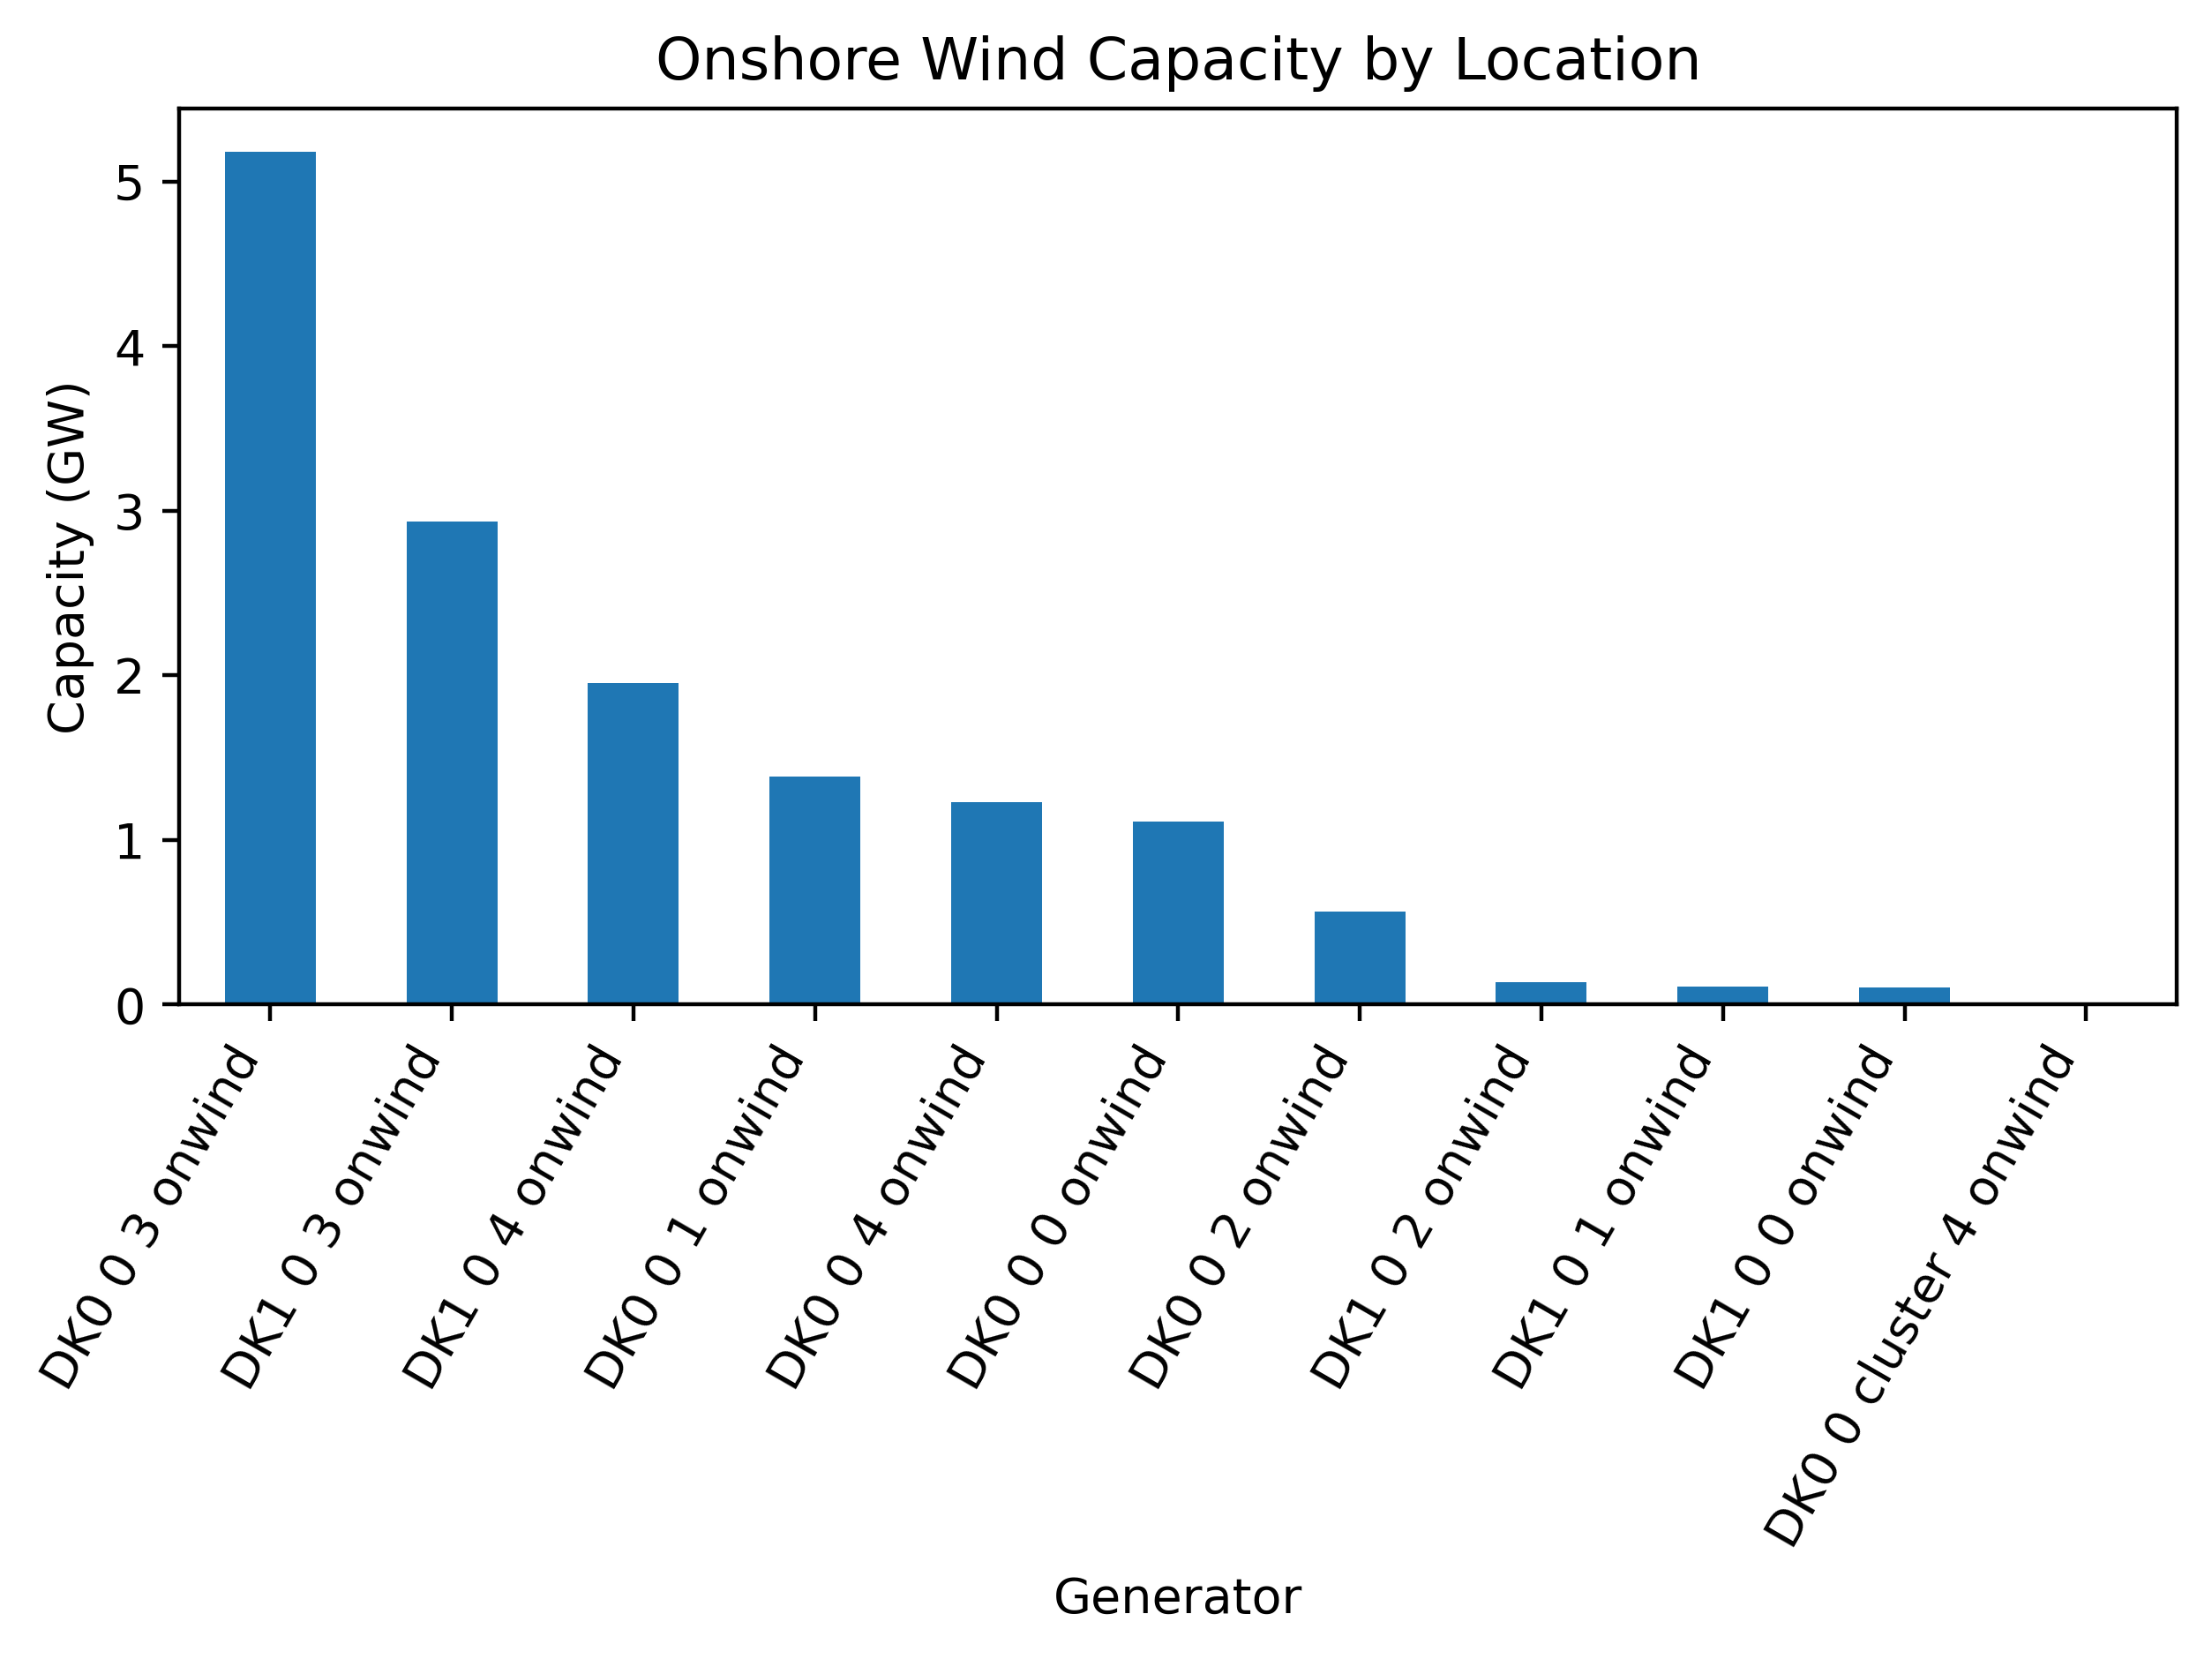

In [222]:
onshore_wind= n.generators.loc[
    n.generators.index.str.contains('onwind'), 'p_nom_opt'
 ].sort_values(ascending=False)/10**3

fig,ax=plt.subplots()
onshore_wind.plot.bar(ax=ax,
                      ylabel="Capacity (GW)",
                      title="Onshore Wind Capacity by Location")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")  
plt.tight_layout()

<Axes: title={'center': 'Onshore Wind Production over time in DK0 cluster'}, xlabel='snapshot', ylabel='Onshore Wind Production (GW)'>

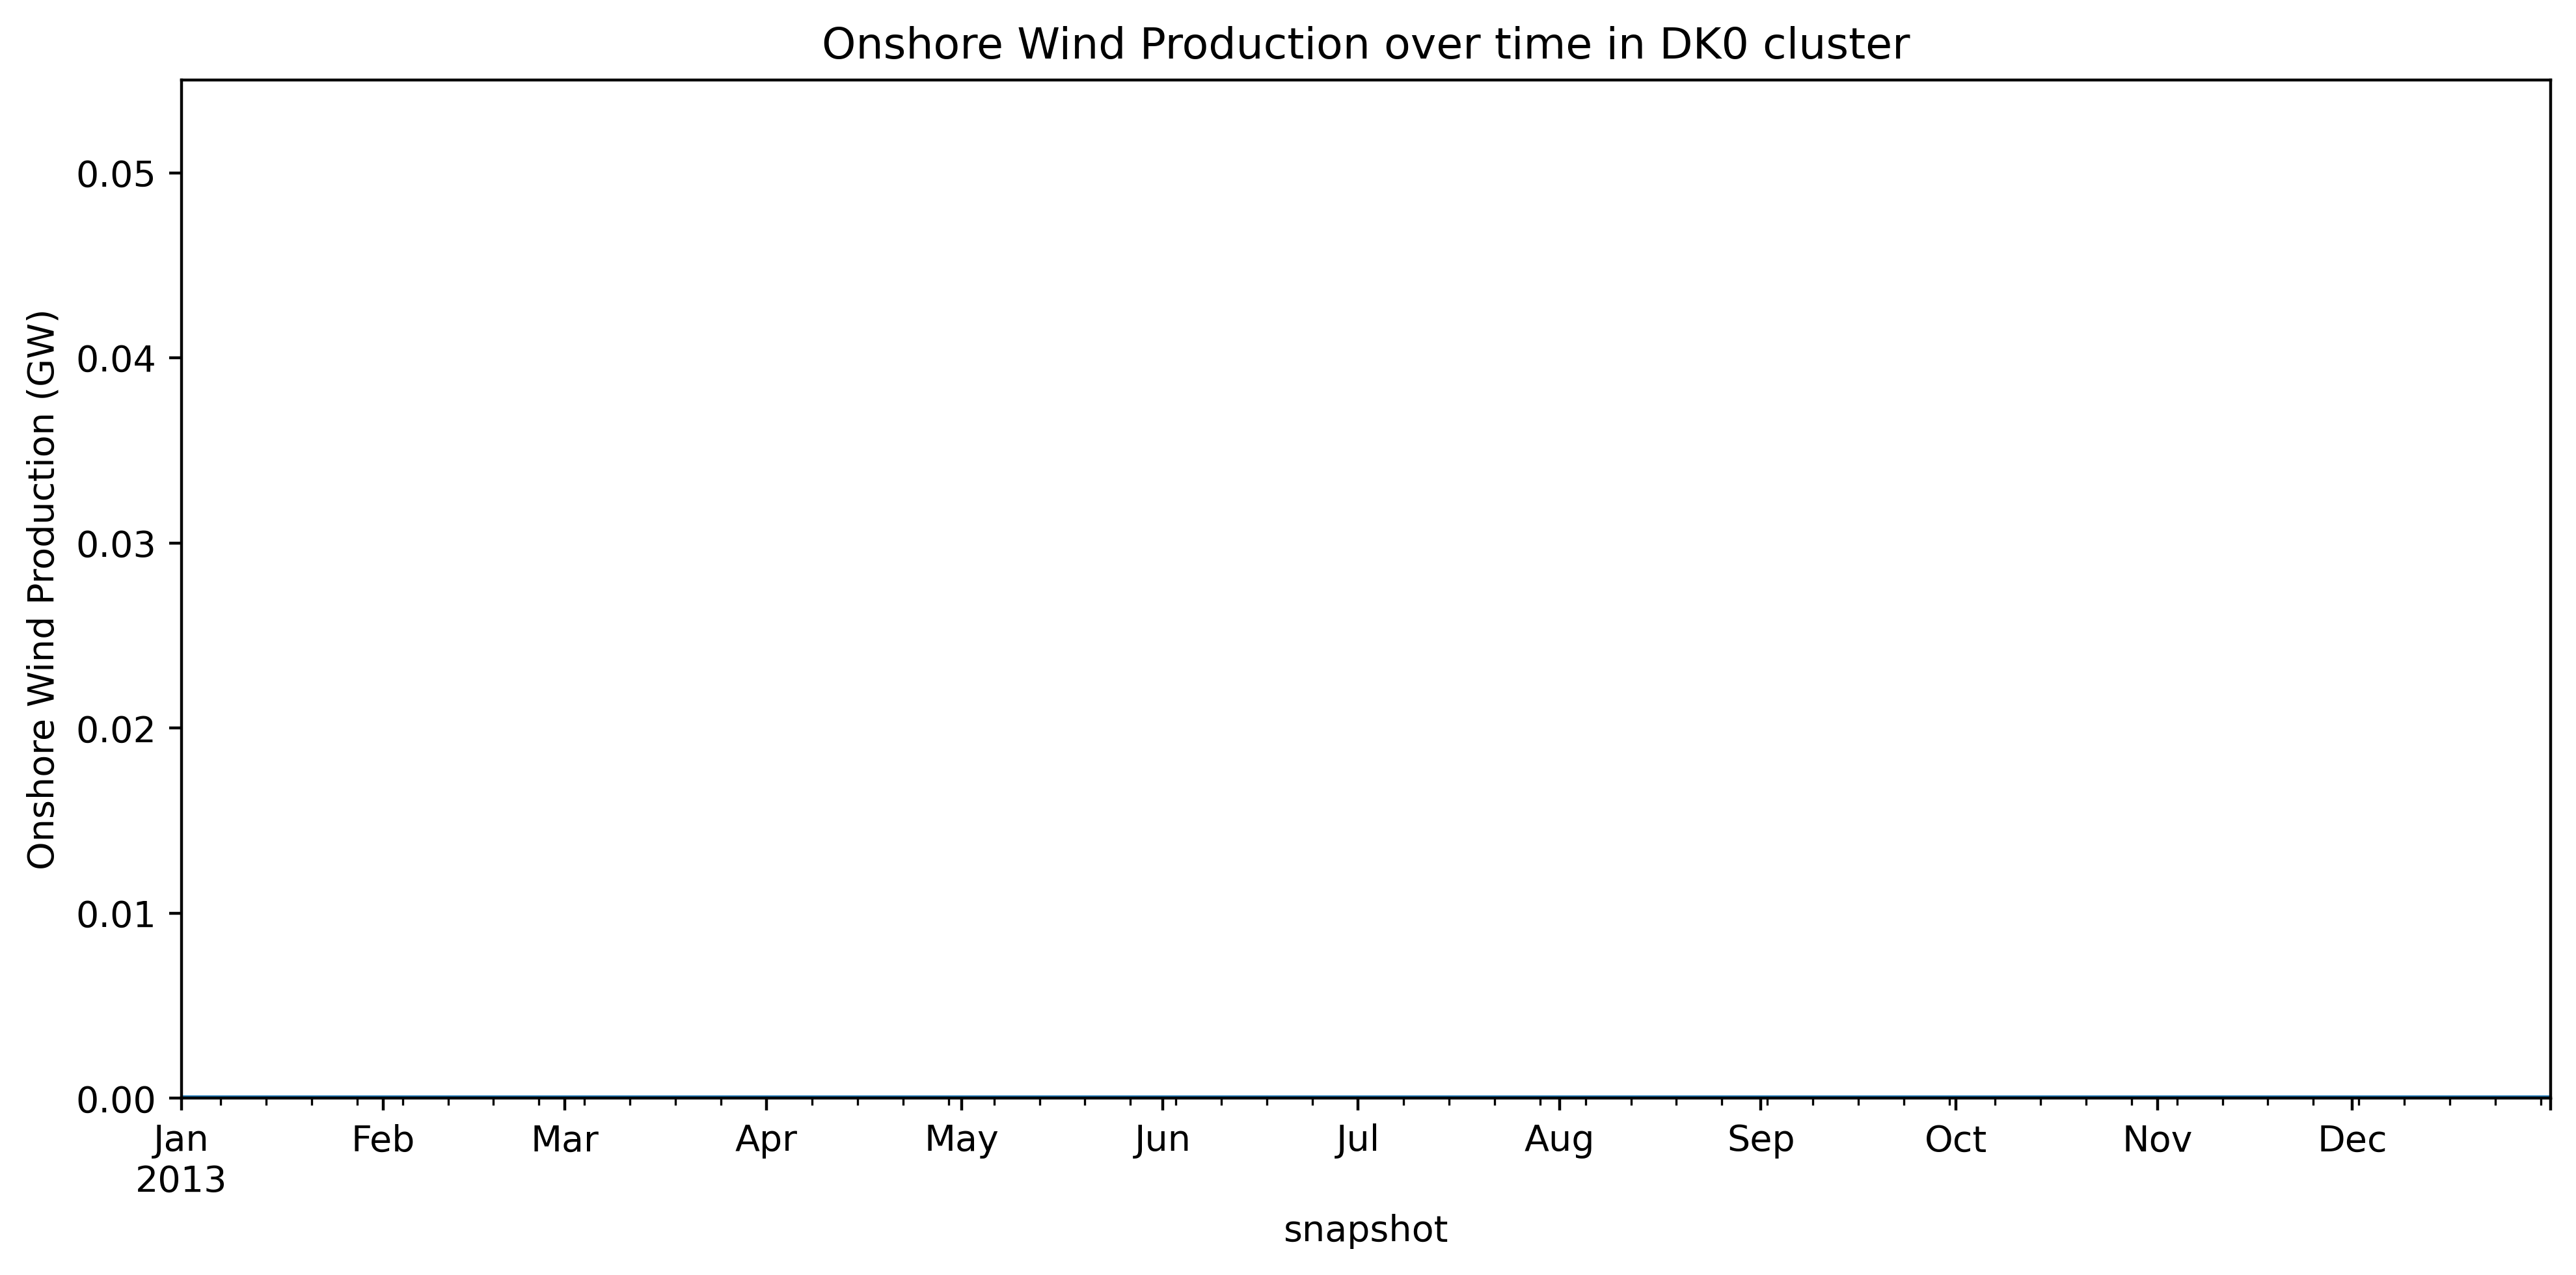

In [223]:
n.generators_t.keys()

onwind_cluster_production=n.generators_t["p"].loc[:, "DK0 0 cluster 4 onwind"]/10**3

fig,ax=plt.subplots(figsize=(10,5))
onwind_cluster_production.plot.area(ylabel="Onshore Wind Production (GW)", title="Onshore Wind Production over time in DK0 cluster", ax=ax)
